In [1]:
#id first_training
#caption Results from the first training
from fastai.vision.all import *
path = untar_data(URLs.PETS)/'images'

def is_cat(x): return x[0].isupper()
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224))

learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /home/ubuntu/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:01<00:00, 46.3MB/s]
[W NNPACK.cpp:64] Could not initialize NNPACK! Reason: Unsupported hardware.


epoch,train_loss,valid_loss,error_rate,time
0,0.159830,0.032483,0.008796,00:10


epoch,train_loss,valid_loss,error_rate,time
0,0.054669,0.029188,0.011502,00:09


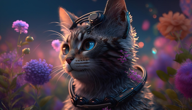

In [17]:
from fastai.vision.all import PILImage
from IPython.display import display
import requests
from io import BytesIO

# URL of the image
url = 'https://img.freepik.com/free-photo/cyber-cat-with-giant-electro-flowers-sunrise-generative-ai_8829-2880.jpg?t=st=1715822649~exp=1715826249~hmac=dd240e13b5d1b2176b8fef5de3701291d84446f323e1cae9cf3ebf7cc79fb7e1&w=1060'

# Download the image
response = requests.get(url)
img = PILImage.create(BytesIO(response.content))

# Create and display a thumbnail
thumbnail = img.to_thumb(192)
display(thumbnail)
# Image Designed by Freepik

In [18]:
is_cat,_,probs = learn.predict(img)
print(f"Is this a cat?: {is_cat}.")
print(f"Probability it's a cat: {probs[1].item():.6f}")

Is this a cat?: True.
Probability it's a cat: 1.000000
